# Basic Neural Network in Python

Below, I explore how to create and train a three-layer neural network in Python, making use of the NumPy linear algebra library. I've broken my code into the following sections:

- __Activation Function__
- __Training Data__
- __Defining Alpha and Size of Hidden Layer__
- __Weights__
- __Training__

## Activation Function

First, we import `numpy` to be able to perform linear algebra operations. Then, we define the logistic function (sigmoid curve), which is key to creating non-linear hypotheses from our data. The logistic function is:

![Logistic Function Equation](logistic-formula.gif)

In [1]:
import numpy as np # Linear algebra library
import matplotlib.pyplot as plt # Charting library

# Defining the logistic function (sigmoid curve)
# This is our activation function
def sigmoid(x, derive=False):
    if(derive==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

The logistic function converts any number to a value between 0 and 1, which can be used as probabilities to train our neural network. We can also use this method to retrieve the derivative of the logistic function, which is useful for the backpropagation process in the neural network.

## Training Data

Next, we'll set up our training data. For training inputs, we have a matrix of four rows and three columns. For training outputs, we have a matrix of four rows and a single column.

In [2]:
# Training input data
x = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

# Training output data
y = np.array([[0],[1],[1],[0]])

## Define Alpha and Size of Hidden Layer

The alpha parameter allows us to use gradient descent to modify the size of updates made to the weights. As you'll see in the output of the training process, using the right alpha parameter allows us to optimize our weights so that we achieve results that better fit our data.

Parametrizing the size of the hidden layer allows us to increase the search space of our neural network, and converge to a global minimum faster.

In [3]:
# Alpha parameter for gradient descent
alpha = 10

# Parametrized size of hidden layer
hiddenSize = 32


## Weights

We need to initialize random weights for our neural network. We only have three layers in this neural network (input, a single hidden layer and output). The first layer has three input units, and the third layer has a single output unit. Since we want to connect every node in the first layer to every node in the second layer, we need a matrix of three rows and a number of columns which matches the number of rows in our hidden layer. Our hidden layer only needs a single column to connect to our output layer.


In [4]:
# WEIGHTS
# Seeding our random number generation
np.random.seed(1)
    
# Initialize weights randomly
# Best practice is to initialize weights with a mean of 0
weights_1 = 2*np.random.random((3,hiddenSize))-1
weights_2 = 2*np.random.random((hiddenSize,1))-1

## Training

In this for-loop, we are performing simultaneous training of our neural network across all examples (4) that we loaded earlier into the variable X. 

The first step of the training process involves attempting prediction of output, given our training example inputs. 

Then we compare our prediction of output to the actual training example output. The adjustment process involves multiplying these error vales by the slope of the logistic function at our prediction values. Take a look at a sample chart of a logistic function below:


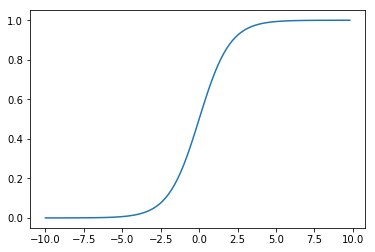

In [5]:
demo_values = np.arange(-10., 10., 0.2)
logistic_values = []
for item in demo_values:
    logistic_values.append(1/(1+np.exp(-item)))
plt.plot(demo_values,logistic_values)
plt.show()


If our predictions are more confident, they will be at either the lower or higher end of the logistic curve. This means that our adjustments will be smaller, because we are incrementing weights by a number which is the result of multiplying the error value by the slope of the logistic curve at the point of our prediction. 

The slope of the logistic curve is closer to zero at both the lower and higher ends. There is likely to be a __small__ amount of error for high confidence predictions, so they only need to be adjusted by a __small__ amount.

However, if our predictions are less confident, they will be closer to the center of the logistic curve, where the slope reaches its maximum value of 1. Therefore, we will make __greater__ adjustments when our model is __more unsure__ about the predictions it makes.

In [6]:
print ("\nTraining with Alpha:" + str(alpha))
       
for iter in range(60000):
    
    # FORWARD PROPAGATION
    
    # Set first layer of neural network equal to our training input data
    l0 = x
    
    # Applying the logistic function to the result of 
    # the dot product between the first layer of the neural network and the weights
    l1 = sigmoid(np.dot(l0, weights_1)) 
    
    # Applying the logisitic function to the result of
    # the dot product again for the second layer of the neural network and the weights
    l2 = sigmoid(np.dot(l1, weights_2))
    
    # ERROR CALCULATION/BACKPROPAGATION
    
    # By subtracting our hypothesis from the training output example
    # we get an error calculation: y - h(x) (familiar from cost function)
    l2_error = y - l2
    
    if (iter% 10000) == 0:
        print ("Error after " + str(iter) + " iterations: "+ str(np.mean(np.abs(l2_error))))
    
    # Multiplying the error amount by the slope of the logistic function
    # at our second layer values, gives us a delta value we can use to update
    # our weights
    l2_delta = l2_error * sigmoid(l2, derive=True)
    
    # We can only calculate error values for our first layer once we have
    # already calculated error for the second layer. Here, we're calculating
    # how much each value in the first layer contributes to error in the second layer
    l1_error = np.dot(l2_delta, weights_2.T)
    
    # Once again, we'll update the error using the slope of the logistic function
    # at our first layer values - to make sure we are updating "in the right direction"
    l1_delta = l1_error * sigmoid(l1, derive=True)
    
    # UPDATE WEIGHTS
    
    # Increment weight values by the result of the dot product 
    # between our layer values and backpropagation delta values
    # Scale our increments by alpha (gradient descent)
    weights_2 += alpha * np.dot(l1.T, l2_delta)
    weights_1 += alpha * np.dot(l0.T, l1_delta)


Training with Alpha:10
Error after 0 iterations: 0.496439922501
Error after 10000 iterations: 0.00225627779723
Error after 20000 iterations: 0.00153822414655
Error after 30000 iterations: 0.00123497929352
Error after 40000 iterations: 0.00105841214612
Error after 50000 iterations: 0.000939718817582
